Dataset available at:
<br>https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
<br>Some of codes were taken from:
<br>https://www.kaggle.com/code/caiodata777/breast-cancer-prediction-98-6-acc-randomforest#Testing-out-models-to-see-whats-best

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# **IMPORT LIBRARIES**

In [166]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import  LabelEncoder, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve

# **IMPORT DATA**

In [129]:
# read data
df = pd.read_csv("/content/drive/MyDrive/Omdena/Challenge: Breast Cancer Detection/Breast Cancer Detection/Data/data.csv")

# **DATA CHECKING**

In [130]:
# data preview
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [131]:
# data dimension
df.shape

(569, 33)

In [132]:
# data columns

df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [133]:
# data type of each column
df.dtypes

# 2 categorical variabels, the rest are numerical variabels

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [134]:
# check missing values
df.isnull().values.any()

True

In [135]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [136]:
# Duplicate check
df.duplicated().sum()

# No duplicate row

0

In [137]:
# full check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [138]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# **DATA CLEANING**

In [139]:
# drop id and Unnamed: 32 columns: resulting in 31 columns

df = df.drop(columns=['id','Unnamed: 32'])
len(df.columns)

31

In [140]:
# encode categorical column: diagnosis
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [141]:
dict(zip(le.classes_, le.transform(le.classes_)))

# benign is mapped as 0
# malignant is mapped as 1

{'B': 0, 'M': 1}

# **DATA EXPLORATION**

In [142]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


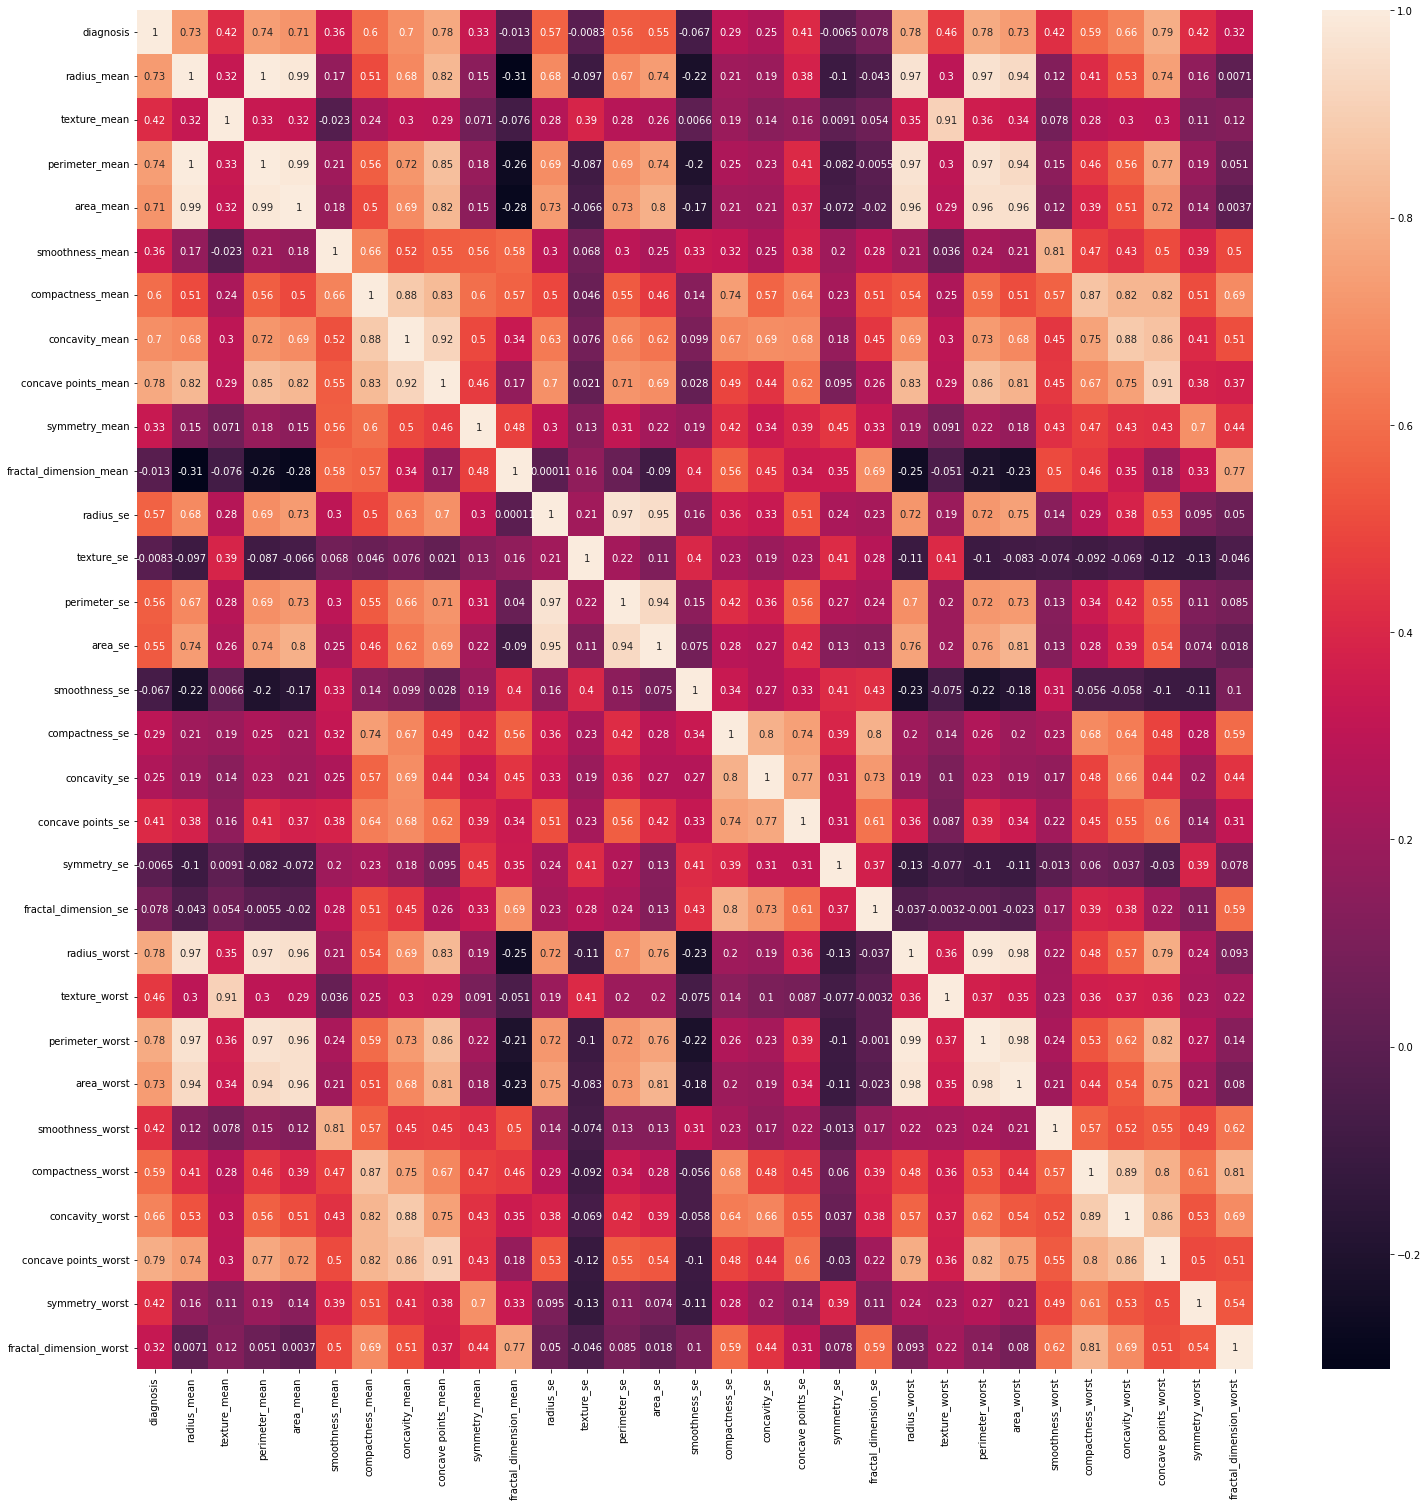

In [143]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)

It can be seen that diagnosis is highly correlated with these features (>= 0.5):
<br> radius_mean, perimeter_mean, area_mean, compactness_mean, concavity_mean, concave points_mean, radius_se, perimeter_se, area_se, radius_worst, perimeter_worst, area_worst, compactness_worst, concavity_worst, concave points_worst

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Class')

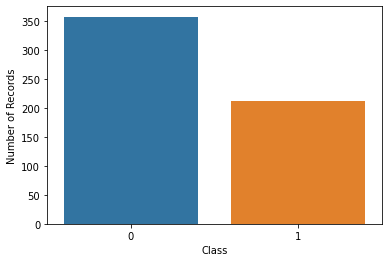

In [144]:
#  show class distribution

sns.countplot(df['diagnosis'])
plt.ylabel('Number of Records')
plt.xlabel('Class')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


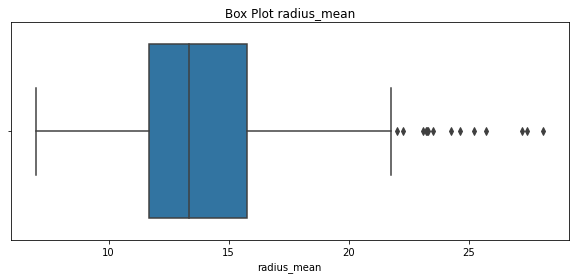

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


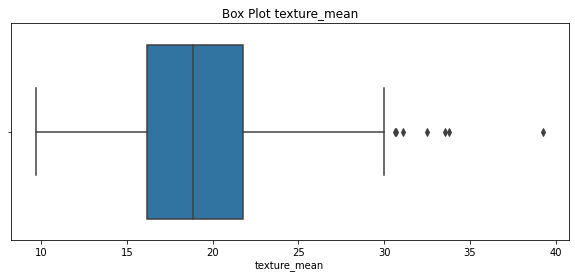

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


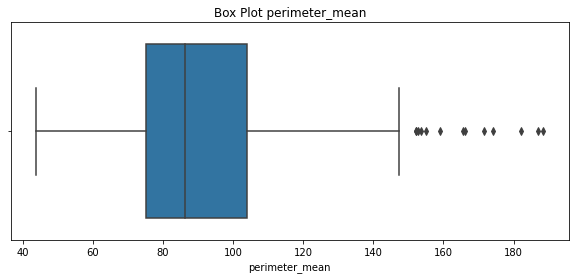

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


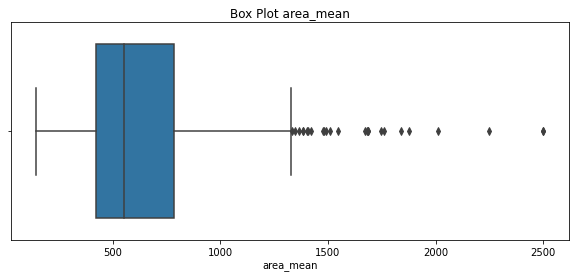

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


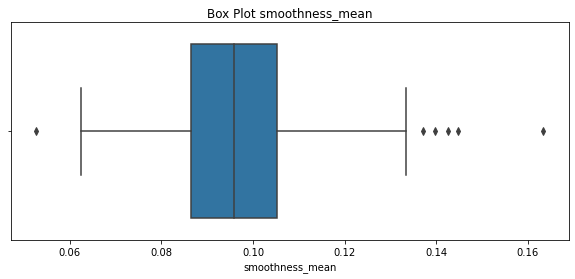

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


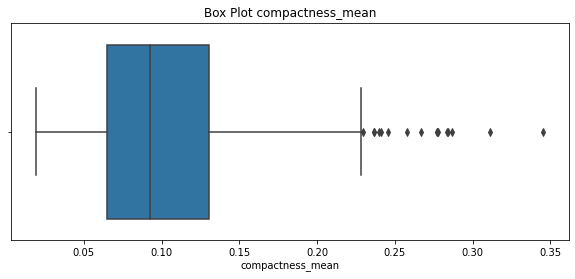

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


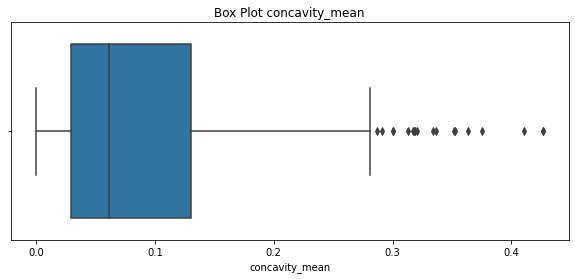

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


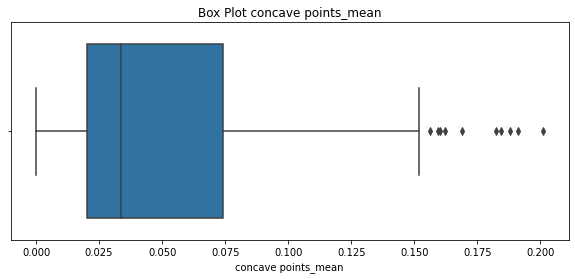

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


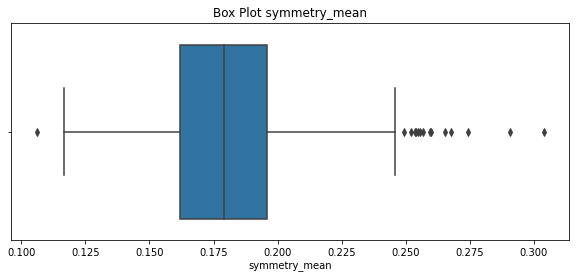

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


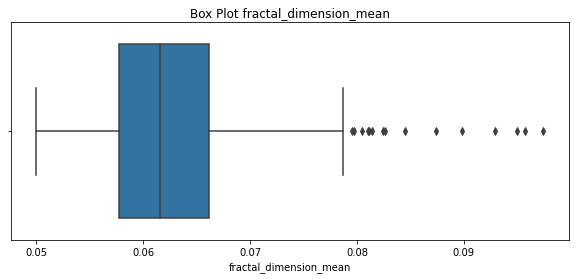

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


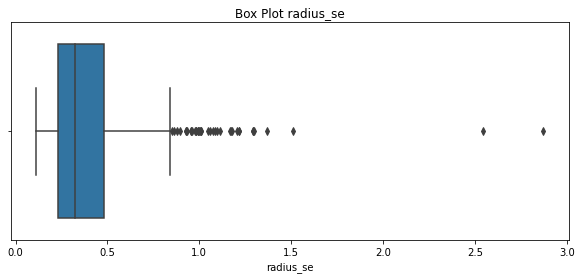

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


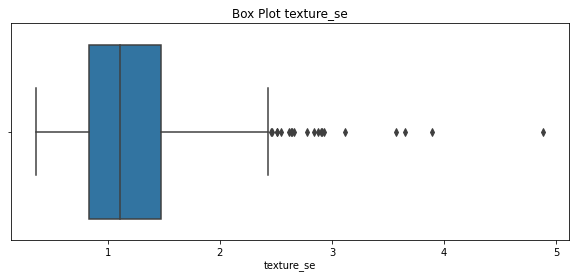

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


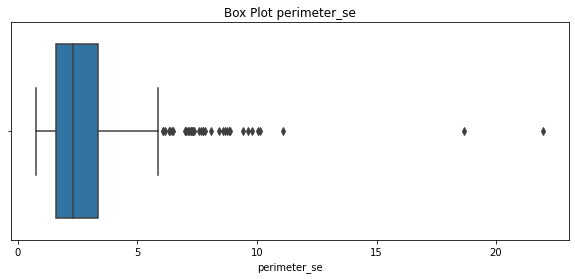

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


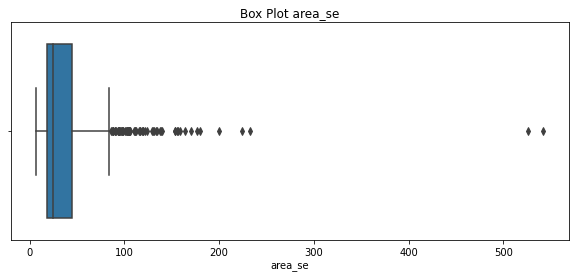

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


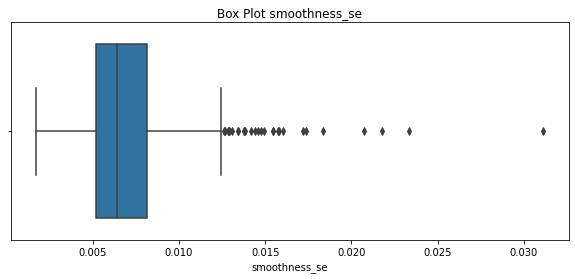

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


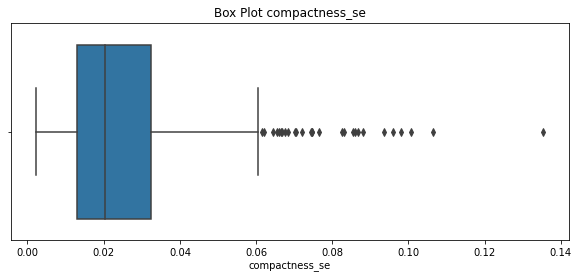

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


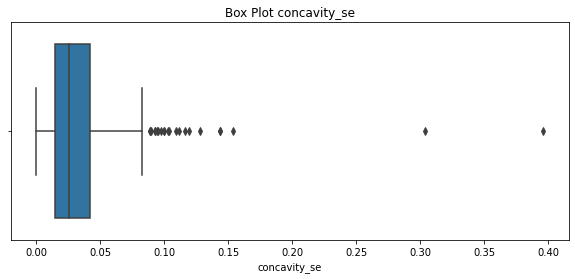

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


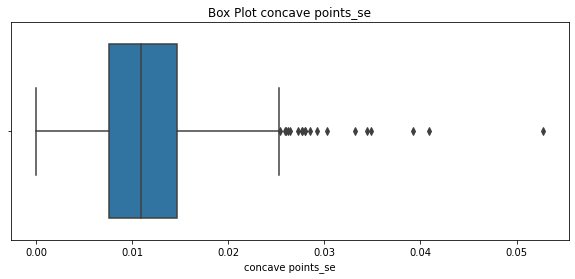

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


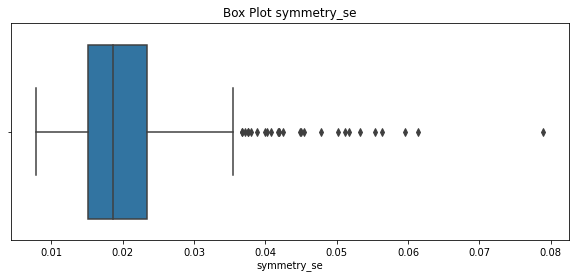

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


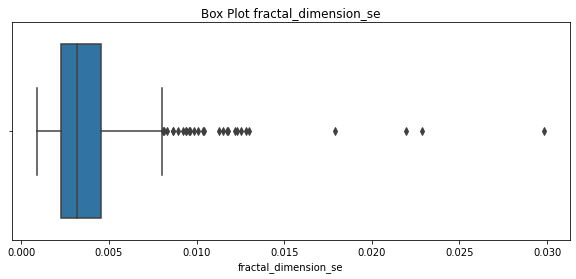

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


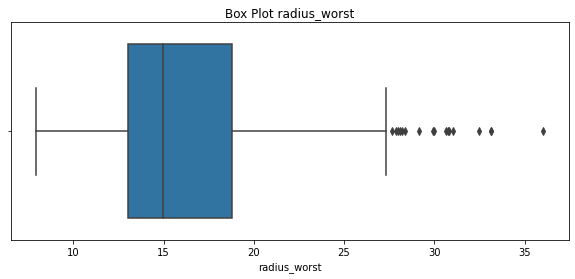

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


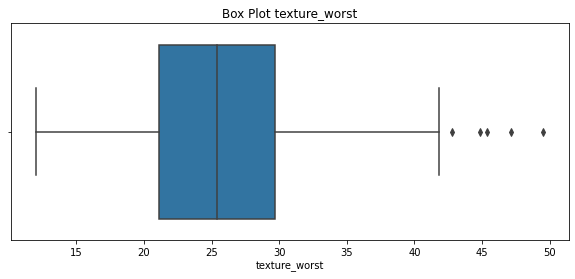

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


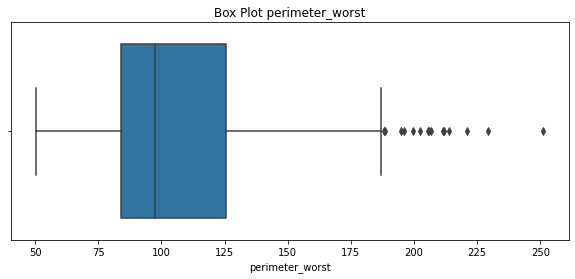

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


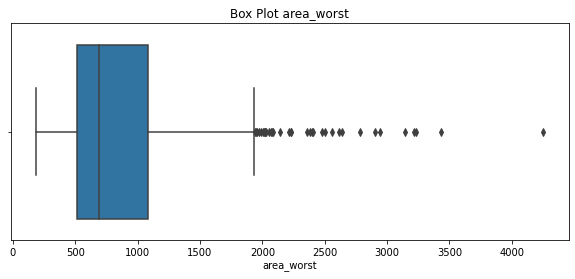

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


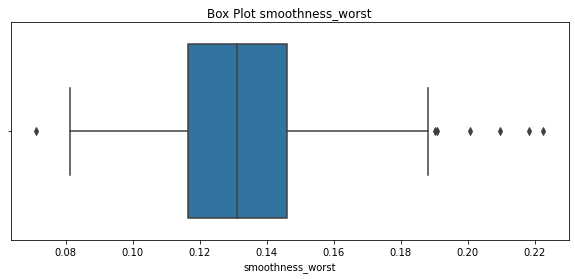

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


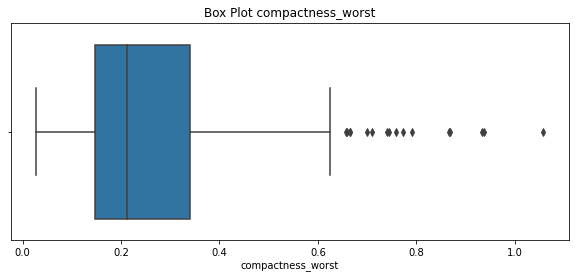

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


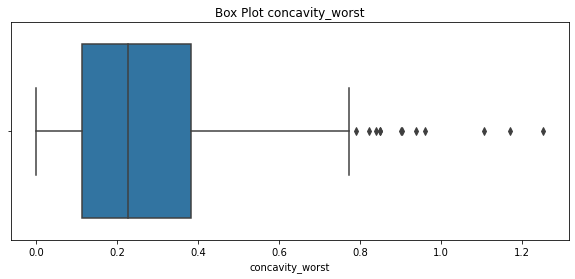

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


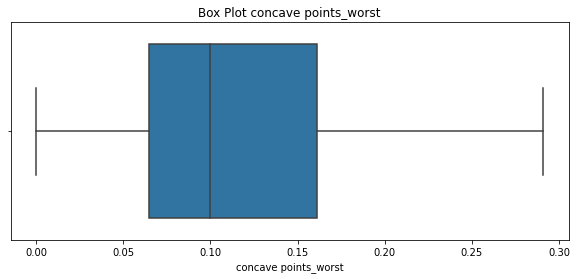

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


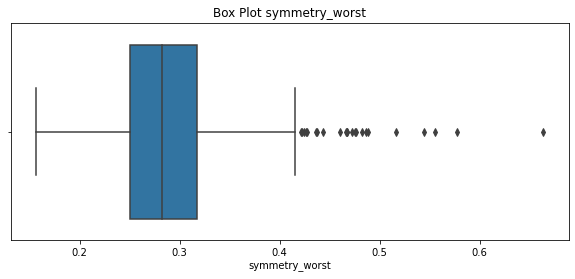

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


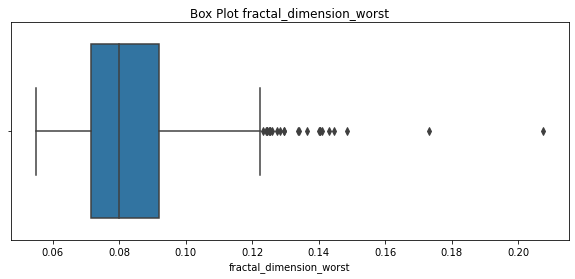

In [145]:
# show outliers in numerical columns

def box_plots(df, column):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot {}".format(column))
    sns.boxplot(df)
    plt.show()


for i in list(df.drop(columns=['diagnosis']).columns):
    box_plots(df[i], i)

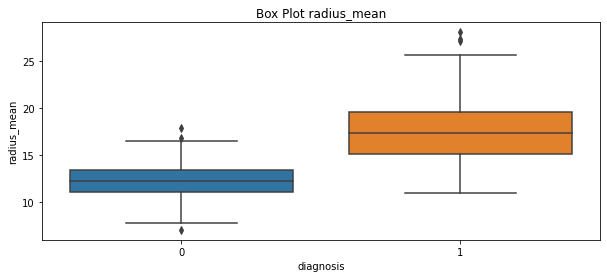

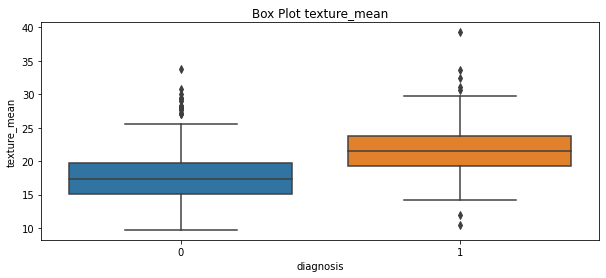

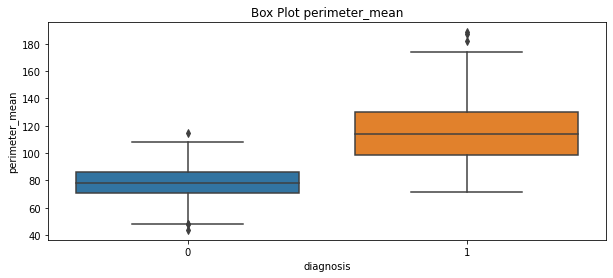

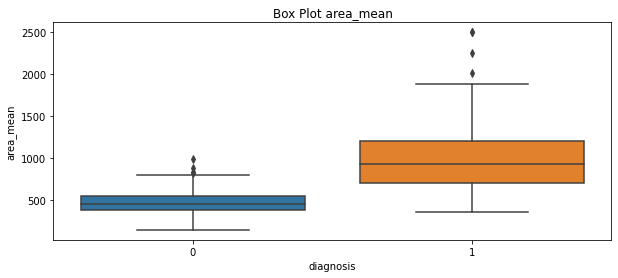

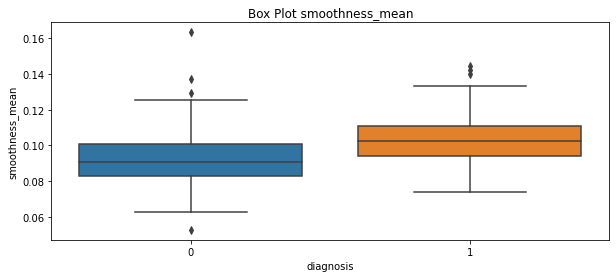

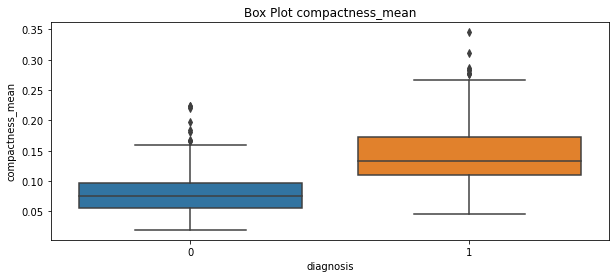

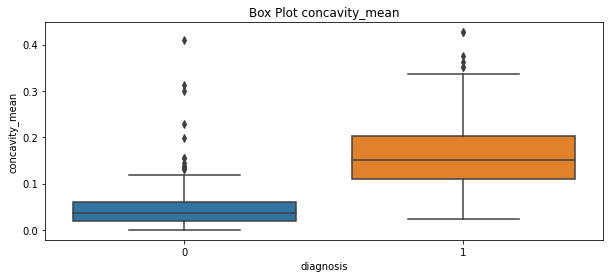

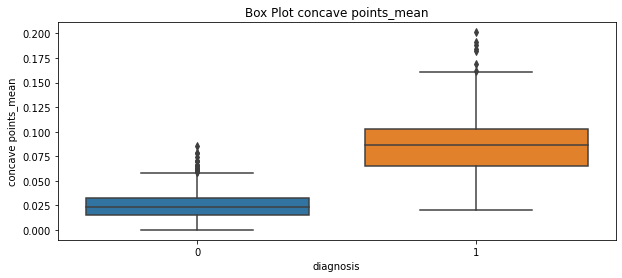

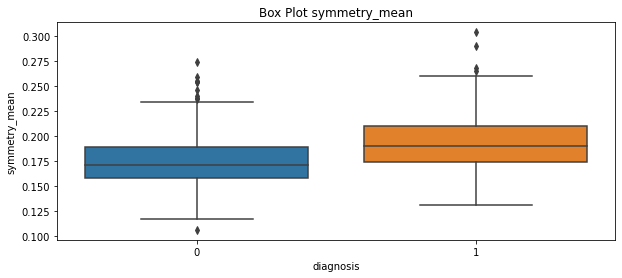

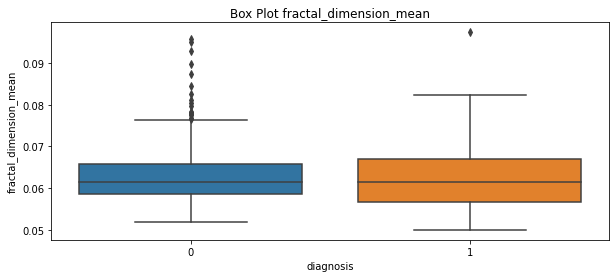

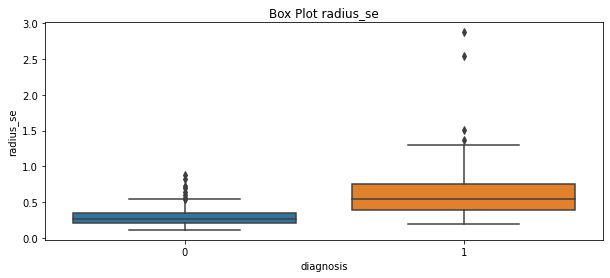

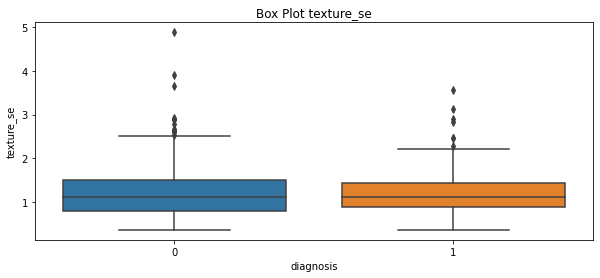

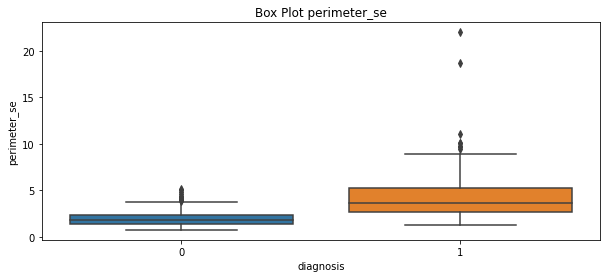

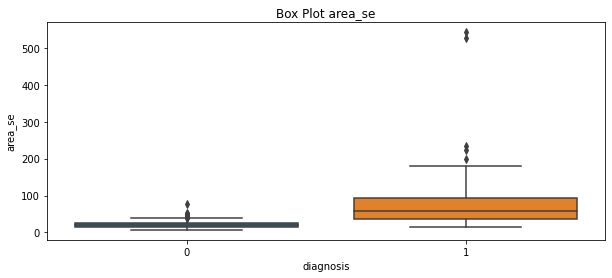

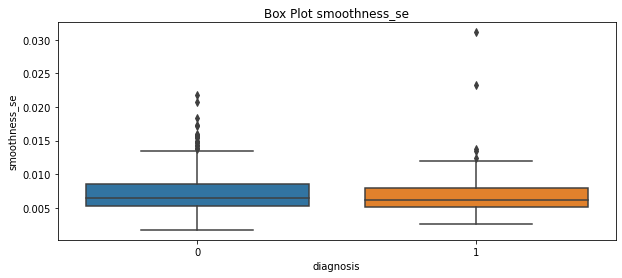

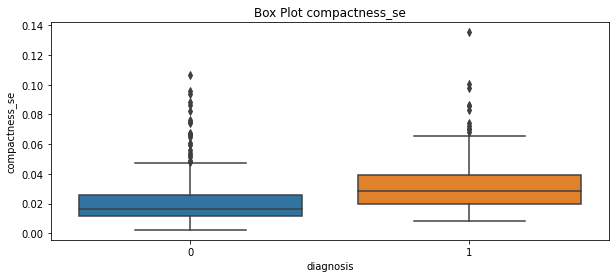

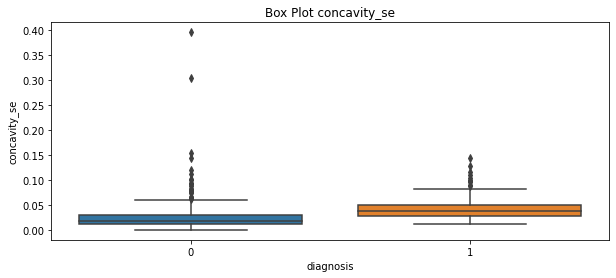

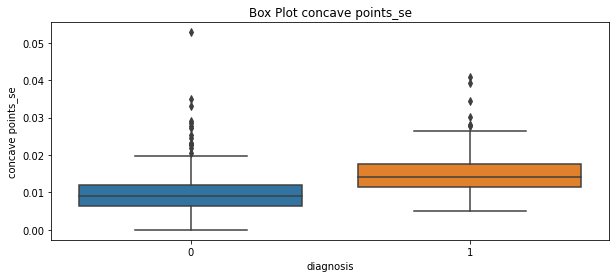

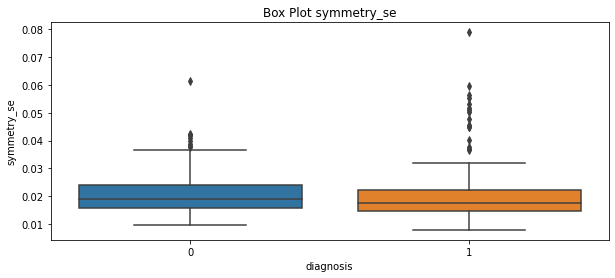

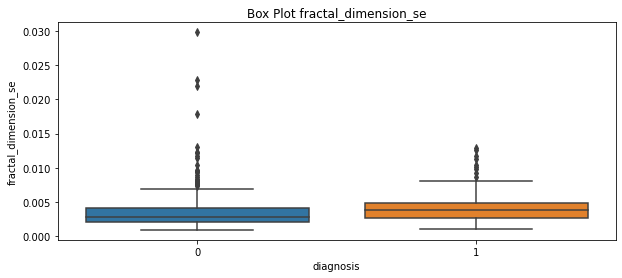

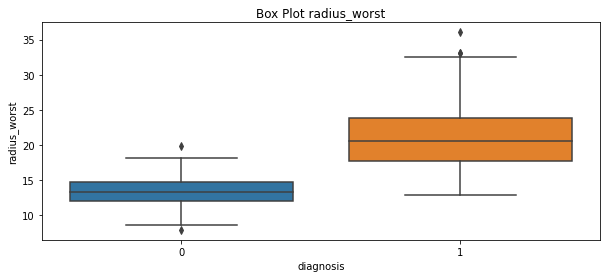

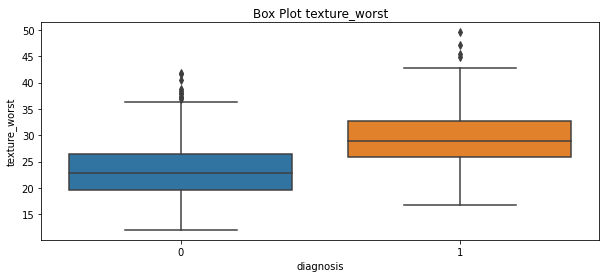

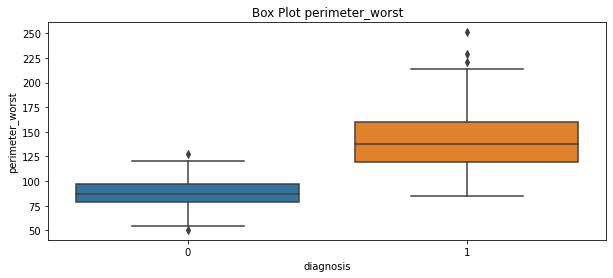

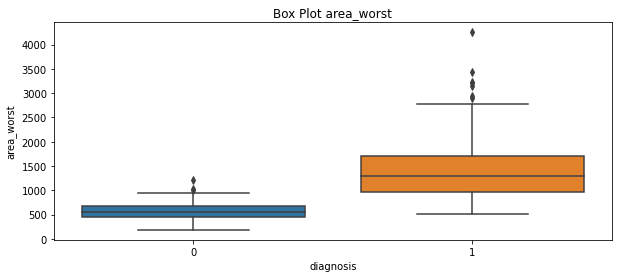

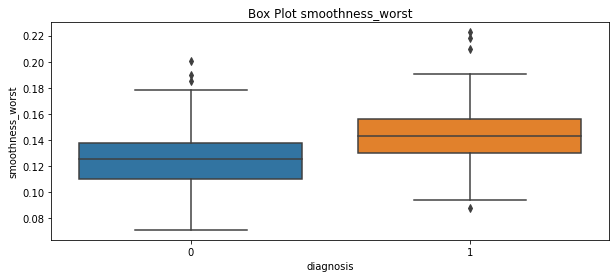

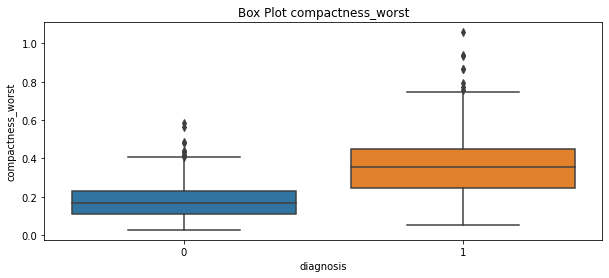

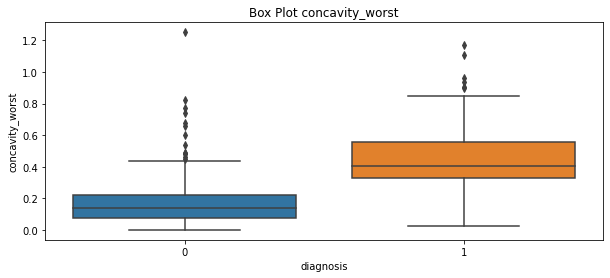

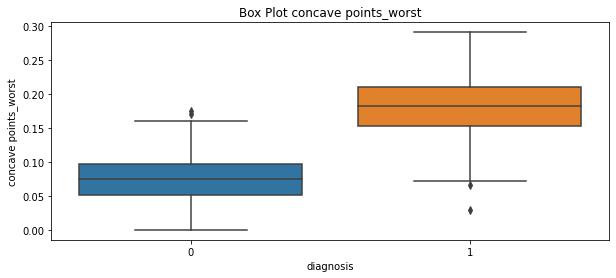

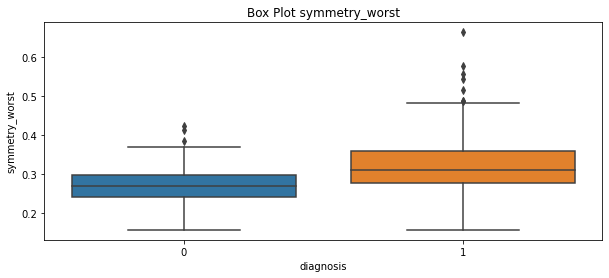

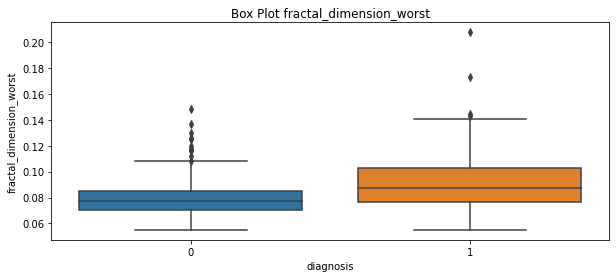

In [146]:
# show outliers in numerical columns and compare between benign and malignant

def box_plots(df, column):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot {}".format(column))
    sns.boxplot(data=df, y=column, x="diagnosis")
    plt.show()


for i in list(df.drop(columns=['diagnosis']).columns):
    box_plots(df, i)

# **PREPARING BEFORE TRAINING**

First try: using all columns
<br>Second try: using highly correlated columns

In [147]:
df_high_corr = df[['diagnosis','radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']]

In [148]:
# For all columns
x_train, x_test, y_train, y_test = train_test_split(df.drop('diagnosis',axis=1),
                                                   df['diagnosis'],
                                                   test_size = 0.2,
                                                   random_state=0)

In [149]:
# For highly correlated columns
x_train_hc, x_test_hc, y_train_hc, y_test_hc = train_test_split(df_high_corr.drop('diagnosis',axis=1),
                                                   df_high_corr['diagnosis'],
                                                   test_size = 0.2,
                                                   random_state=0)

# **TRAINING WITH ALL COLUMNS**

Using Normalizer() instead of MinMaxScaler() based on this article:
<br>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7349542/#B14-healthcare-08-00111

In [150]:
pipe1 = Pipeline([
    ('normalizer', Normalizer()),
    ('model', SVC(random_state=42))
])

modelsvm = pipe1.fit(x_train, y_train)

y_pred_svm = modelsvm.predict(x_test)

In [151]:
pipe2 = Pipeline([
    ('normalizer', Normalizer()),
    ('model', LogisticRegression(random_state=42))
])

modellr = pipe2.fit(x_train, y_train)

y_pred_lr = modellr.predict(x_test)

In [152]:
pipe3 = Pipeline([
    ('normalizer', Normalizer()),
    ('model', KNeighborsClassifier())
])

modelkn = pipe3.fit(x_train, y_train)

y_pred_kn = modelkn.predict(x_test)

In [153]:
pipe4 = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

modelrf = pipe4.fit(x_train, y_train)

y_pred_rf = modelrf.predict(x_test)

In [154]:
pipe5 = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

modeldt = pipe5.fit(x_train, y_train)

y_pred_dt = modeldt.predict(x_test)

In [155]:
pipe6 = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))
])

modelgb = pipe6.fit(x_train, y_train)

y_pred_gb = modelgb.predict(x_test)

In [156]:
print('Accuracy Score SVM: {:.4f}'.format(accuracy_score(y_test, y_pred_svm)))
print('Accuracy score LR:  {:.4f}'.format(accuracy_score(y_test, y_pred_lr)))
print('Accuracy score KN:  {:.4f}'.format(accuracy_score(y_test, y_pred_kn)))
print('Accuracy Score RF:  {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))
print('Accuracy Score DT:  {:.4f}'.format(accuracy_score(y_test, y_pred_dt)))
print('Accuracy Score GB:  {:.4f}'.format(accuracy_score(y_test, y_pred_gb)))

Accuracy Score SVM: 0.8684
Accuracy score LR:  0.7193
Accuracy score KN:  0.9386
Accuracy Score RF:  0.9737
Accuracy Score DT:  0.9123
Accuracy Score GB:  0.9649


# **TRAINING WITH HIGHLY CORRELATED COLUMNS**

Using Normalizer() instead of MinMaxScaler() based on this article:
<br>https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7349542/#B14-healthcare-08-00111

In [157]:
pipe1_hc = Pipeline([
    ('normalizer', Normalizer()),
    ('model', SVC(random_state=42))
])

modelsvm_hc = pipe1_hc.fit(x_train_hc, y_train_hc)

y_pred_svm_hc = modelsvm_hc.predict(x_test_hc)

In [158]:
pipe2_hc = Pipeline([
    ('normalizer', Normalizer()),
    ('model', LogisticRegression(random_state=42))
])

modellr_hc = pipe2_hc.fit(x_train_hc, y_train_hc)

y_pred_lr_hc = modellr_hc.predict(x_test_hc)

In [159]:
pipe3_hc = Pipeline([
    ('normalizer', Normalizer()),
    ('model', KNeighborsClassifier())
])

modelkn_hc = pipe3_hc.fit(x_train_hc, y_train_hc)

y_pred_kn_hc = modelkn_hc.predict(x_test_hc)

In [160]:
pipe4_hc = Pipeline([
    ('model', RandomForestClassifier(random_state=42))
])

modelrf_hc = pipe4_hc.fit(x_train_hc, y_train_hc)

y_pred_rf_hc = modelrf_hc.predict(x_test_hc)

In [161]:
pipe5_hc = Pipeline([
    ('model', DecisionTreeClassifier(random_state=42))
])

modeldt_hc = pipe5_hc.fit(x_train_hc, y_train_hc)

y_pred_dt_hc = modeldt_hc.predict(x_test_hc)

In [162]:
pipe6_hc = Pipeline([
    ('model', GradientBoostingClassifier(random_state=42))
])

modelgb_hc = pipe6_hc.fit(x_train_hc, y_train_hc)

y_pred_gb_hc = modelgb_hc.predict(x_test_hc)

In [163]:
print('Accuracy Score SVM: {:.4f}'.format(accuracy_score(y_test_hc, y_pred_svm_hc)))
print('Accuracy score LR:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_lr_hc)))
print('Accuracy score KN:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_kn_hc)))
print('Accuracy Score RF:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_rf_hc)))
print('Accuracy Score DT:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_dt_hc)))
print('Accuracy Score GB:  {:.4f}'.format(accuracy_score(y_test_hc, y_pred_gb_hc)))

Accuracy Score SVM: 0.8684
Accuracy score LR:  0.7193
Accuracy score KN:  0.9211
Accuracy Score RF:  0.9386
Accuracy Score DT:  0.9386
Accuracy Score GB:  0.9561


# **IMPROVE RANDOM FOREST WITH ALL FEATURES**

In [167]:
rfc = RandomForestClassifier(random_state=42)

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [168]:
rfc_cv = RandomizedSearchCV(estimator = rfc,  param_distributions = params_grid, verbose = 0, cv = 5, n_iter = 100)

rfc_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]})

In [169]:
rfc_cv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': False}

# **RETRAINING WITH BEST MODEL**

In [175]:
best_rf = RandomForestClassifier(
    n_estimators =  1400,
    min_samples_split = 2,
    min_samples_leaf =  1,
    max_features =  'auto',
    max_depth = 70,
    bootstrap =  False,
    random_state = 42)

In [176]:
best_rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, n_estimators=1400,
                       random_state=42)

In [177]:
y_pred_best_rf = best_rf.predict(x_test)

In [178]:
accuracy_score(y_test, y_pred_best_rf) 

# It's seem like there is no improvement after we use RandomGridSearchCV

0.9736842105263158

In [181]:
print(classification_report(y_test, y_pred_best_rf))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98        67
           1       0.96      0.98      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



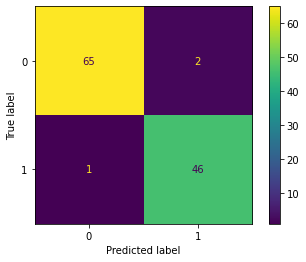

In [183]:
cm = confusion_matrix(y_test, y_pred_best_rf, labels=best_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=best_rf.classes_)
disp.plot()